Camada Física da Computação

Aula 13

Rafael.Corsi@insper.edu.br

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from scipy import signal
from scipy.fftpack import fft, fftshift

In [9]:
def generateSin(freq, time, fs):
    n = time*fs
    x = np.linspace(0.0, time, n)
    s = np.sin(freq*x*2*np.pi)
    return (x, s)

In [10]:
def calcFFT(signal, fs):
    # https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
    #y  = np.append(signal, np.zeros(len(signal)*fs))
    N  = len(signal)
    T  = 1/fs
    xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)
    yf = fft(signal)
    return(xf, fftshift(yf))

## Propriedades dos sinais 

In [11]:
fs  = 100   # pontos por segundo (frequência de amostragem)
A   = 1.5   # Amplitude
F   = 1     # Hz
T   = 4     # Tempo em que o seno será gerado
t   = np.linspace(-T/2,T/2,T*fs)

# Prática em Fourier

## Senoide única

 - Gere uma senoide de 5Hz 

### Para analisar :

 - Exiba o sinal no tempo e o Fourier do mesmo (módulo e fase)
 - Analíse a composição espectal desse sinal.
 - Calcule a banda do sinal

<Container object of 3 artists>

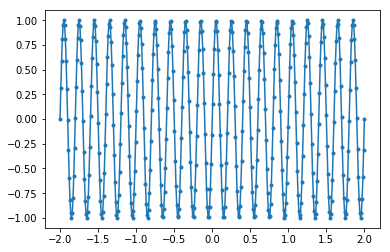

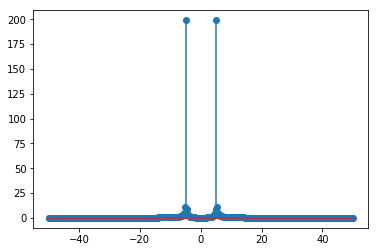

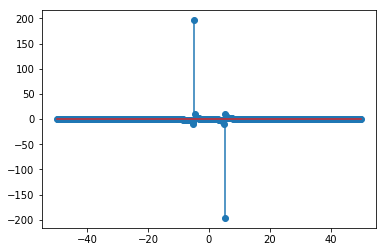

In [12]:
x, y = generateSin(5,T,fs)
plt.figure()
plt.plot(t, y, '.-')

X, Y = calcFFT(y,fs)
plt.figure()
plt.stem(X,np.abs(Y))

plt.figure()
plt.stem(X,np.imag(Y))

## Senoides 

 - Gere duas senoide de mesma amplitude e frequência 5Hz e 8Hz
 
### Para analisar :
 
 - Exiba o sinal no tempo e o Fourier do mesmo (módulo e fase)
 - Analíse a composição espectal desse sinal.
 - Calcule a banda do sinal

<Container object of 3 artists>

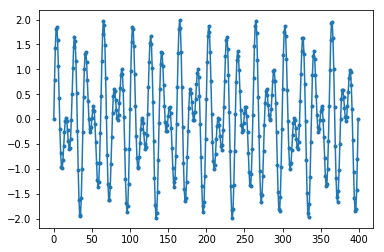

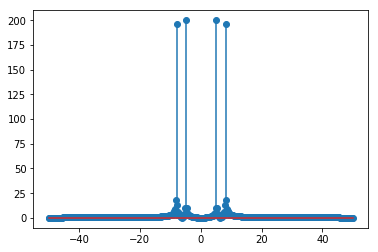

In [13]:
x1, y1 = generateSin(5,T,fs)
x2, y2 = generateSin(8,T,fs)
y = y1+y2
plt.figure()
plt.plot(y, '.-')

X, Y = calcFFT(y,fs)
plt.figure()
plt.stem(X,np.abs(Y))

## Onda Quadrada nivel DC = 0

 - Gere uma onda quadrada em torno do eixo X de amplitude 3 e frequência 1Hz 
     - dica : signal.square 
     
### Para analisar :
 
 - Exiba o sinal no tempo e o Fourier do mesmo (módulo e fase)
 - Analíse a composição espectal desse sinal.
 - Calcule a banda do sinal


<Container object of 3 artists>

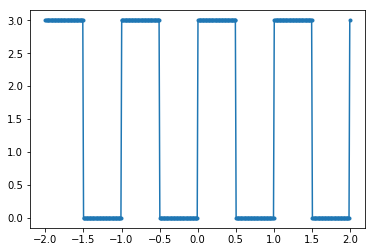

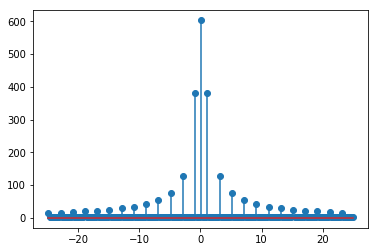

In [14]:
y = 1.5 + 1.5*signal.square(2 * np.pi * F * t)
plt.figure()
plt.plot(t, y, '.-')

X, Y = calcFFT(y,fs)
plt.figure()
plt.stem(X[100:300],np.abs(Y[100:300]))

## Pulso

 - Gere um pulso em torno da origem de duração (1.5s, 1s, 0.5s, 0.025s)
     - dica : signal.square 
     
### Para analisar
     
 - Exiba o sinal no tempo e o Fourier dos sinais (módulo )
 - Analíse a composição espectal dos pulsos (com duração distintas)
 - Calcule as bandas dos sinais


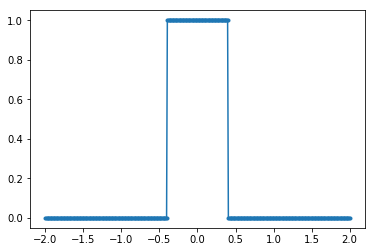

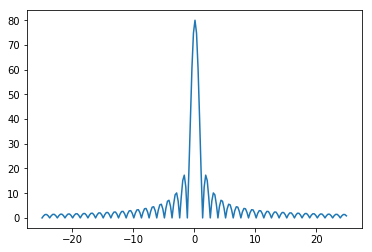

In [34]:
width = 0.2
w = int(T*fs*width)
N = T*fs
y0 = np.zeros(N//2-w//2)
y1 = np.ones(w) 
y2 = np.zeros(N-len(y0)-len(y1))

y = np.append(y0,y1)
y = np.append(y,y2)

plt.figure()
plt.plot(t,y, '.-')

X, Y = calcFFT(y,fs)
plt.figure()
plt.plot(X[100:300],np.abs(Y[100:300]))

## Sync

 - Gere um sinc (sin(t)/t) em torno da origem de duração = (t*10), (t*5), (t*2)
     - dica : np.sync(t*10) 

### Para analisar :
     
 - Exiba o sinal no tempo e o Fourier dos sinais (módulo)
 - Analíse a composição espectal dos diferentes syncs (com duração distintas)
 - Calcule as bandas dos sinais

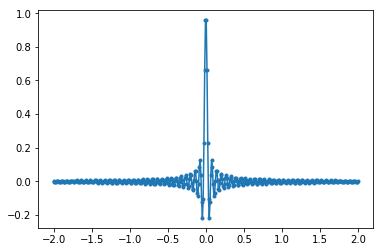

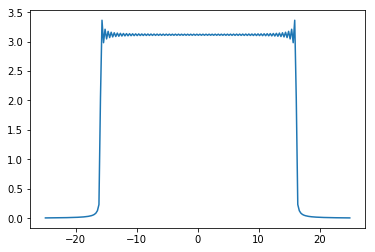

In [35]:
y = np.sinc(t*32)

plt.figure()
plt.plot(t, y, '.-')

X, Y = calcFFT(y,fs)
plt.figure()
plt.plot(X[100:300],np.abs(Y[100:300]))

## Onda Quadrada Modulada em AM

 - Gere um pulso de duração 1 segundo
 - Gere uma senoide de frequência 15Hz
 - Multipleque a função pulso pela senoide
 
### Para analisar :
 
 - Exiba o sinal no tempo e o Fourier dos sinais (módulo)
 - Analíse a composição espectal do sinal resultante.
 - Calcule a banda do sinal


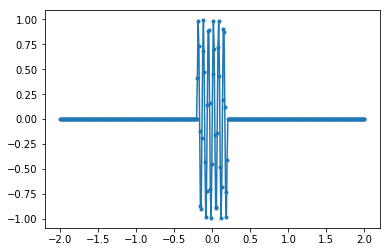

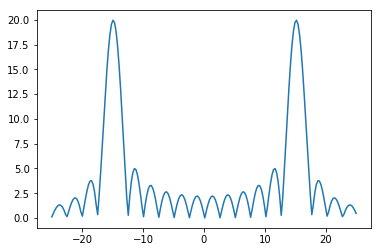

In [36]:
width = 0.1
w = int(T*fs*width)
N = T*fs
y0 = np.zeros(N//2-w//2)
y1 = np.ones(w) 
y2 = np.zeros(N-len(y0)-len(y1))

y = np.append(y0,y1)
y = np.append(y,y2)

x3, y3 = generateSin(15,T,fs)
y = y*y3

plt.figure()
plt.plot(t,y, '.-')

X, Y = calcFFT(y,fs)
plt.figure()
plt.plot(X[100:300],np.abs(Y[100:300]))

## Sync modulado em AM

 - Gere um sync de duração t*10 segundos
 - Gere uma senoide de frequência 15Hz
 - Multipleque a função sync pela senoide
 
### Para analisar :
 
 - Exiba o sinal no tempo e o Fourier dos sinais (módulo)
 - Analíse a composição espectal do sinal resultante.
 - Calcule a banda do sinal


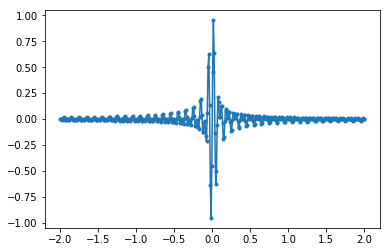

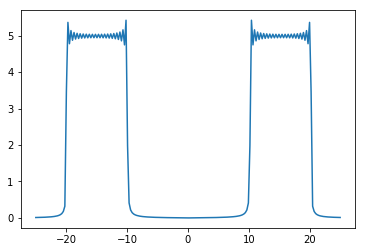

In [19]:
y1 = np.sinc(t*10)
x1, y2 = generateSin(15,T,fs)
y= y1*y2

plt.figure()
plt.plot(t, y, '.-')

X, Y = calcFFT(y,fs)
plt.figure()
plt.plot(X[100:300],np.abs(Y[100:300]))